# Most Streamed Spotify Songs of 2023

This dataset gathers a comprehensive list of the most streamed songs from 2023, all taken from Spotify. 

In [217]:
# Impoting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

## Load Dataset

In [5]:
# Load data with all columns showing

data = pd.read_csv(r"spotify-2023(1).csv")
pd.set_option('display.max_columns', 24)
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


## Data Cleaning

In [6]:
# To see any null data in the data

data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [7]:
# Deleting a column that has null values

delete_column = "key" 
data = data.drop(delete_column, axis=1)
delete_column_2 = "in_shazam_charts" 
data = data.drop(delete_column_2, axis=1)

In [8]:
# To see any null data in the data

data.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [9]:
# Statistical summary of the data

data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [220]:
# The most common release year 

info_year = data["released_year"].mode()
info_year

0    2022
Name: released_year, dtype: int64

In [219]:
# The most common release month

info_month = data["released_month"].mode()
info_month

0    1
Name: released_month, dtype: int64

## Data Analysis

### Top 5 Most Popular Artists

In [10]:
# Top 5 most popular artists based on the number of songs they have on the chart

top_5_artists = data.groupby("artist(s)_name").count().sort_values (by= "track_name", ascending = False)["track_name"][:5]
top_5_artists

artist(s)_name
Taylor Swift    34
The Weeknd      22
SZA             19
Bad Bunny       19
Harry Styles    17
Name: track_name, dtype: int64

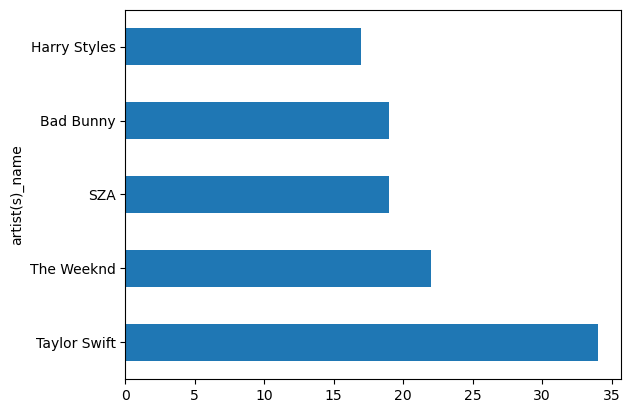

In [14]:
top_5_artists.plot.barh()
plt.show()

### Top 5 Least Popular Artists

In [197]:
# Top 5 least popular artists based on the number of songs they have on the chart

top_5_artists = data.groupby("artist(s)_name").count().sort_values (by= "track_name", ascending = True)["track_name"][:5]
top_5_artists

artist(s)_name
Lady Gaga, Bradley Cooper    1
NIKI                         1
NLE Choppa                   1
NMIXX                        1
Natanael Cano                1
Name: track_name, dtype: int64

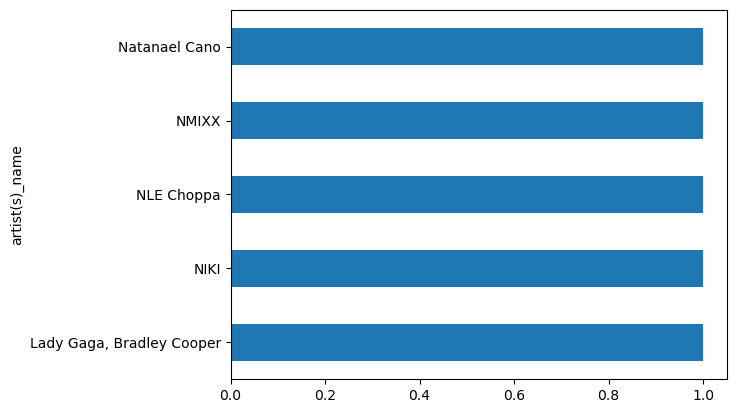

In [198]:
top_5_artists.plot.barh()
plt.show()

### Top 10 Most Streamed Songs

In [205]:
# Top 10 most streamed songs in the data

# To change streams type from string to int
data['streams'] = data['streams'].astype(int)

top_ten_streamed= data[["track_name", "artist(s)_name", "streams"]].sort_values(by ="streams", ascending = False).head(10)
top_ten_streamed

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3703895074
179,Shape of You,Ed Sheeran,3562543890
86,Someone You Loved,Lewis Capaldi,2887241814
620,Dance Monkey,Tones and I,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
162,One Dance,"Drake, WizKid, Kyla",2713922350
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
140,Believer,Imagine Dragons,2594040133
725,Closer,"The Chainsmokers, Halsey",2591224264
48,Starboy,"The Weeknd, Daft Punk",2565529693


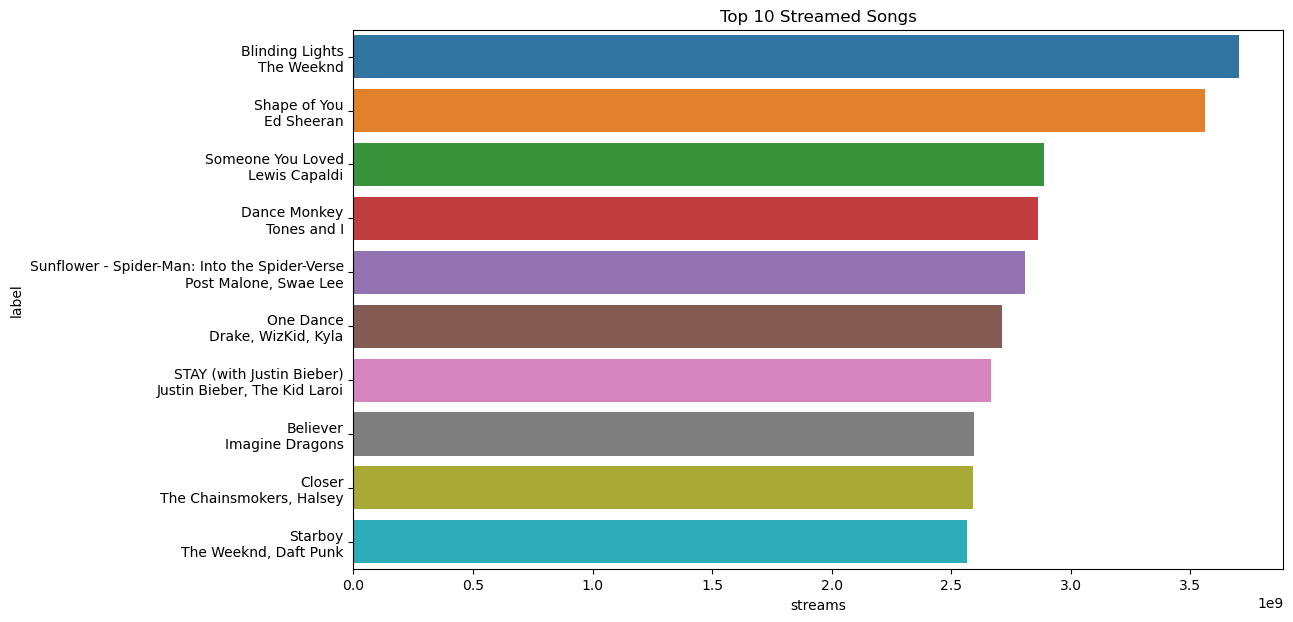

In [206]:
top_ten_streamed["label"]= top_ten_streamed["track_name"] + "\n" + top_ten_streamed["artist(s)_name"]
plt.figure(figsize=(12,7))
sns.barplot(x= "streams", y = "label", data=top_ten_streamed)
plt.title("Top 10 Streamed Songs")
plt.show()

### The 10 Least Streamed Songs

In [203]:
# Top 10 least streamed songs in the data

least_ten_streamed= data[["track_name", "artist(s)_name", "streams"]].sort_values(by ="streams", ascending = True).head(10)
least_ten_streamed

,track_name,artist(s)_name,streams
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2762
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",1365184
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",11599388
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",11956641
68,Overdrive,Post Malone,14780425
58,S91,Karol G,16011326
30,Rush,Troye Sivan,22581161
248,Danger (Spider) (Offset & JID),"Offset, JID",24975653
104,New Jeans,NewJeans,29562220
193,Better Than Revenge (Taylor's Version),Taylor Swift,30343206


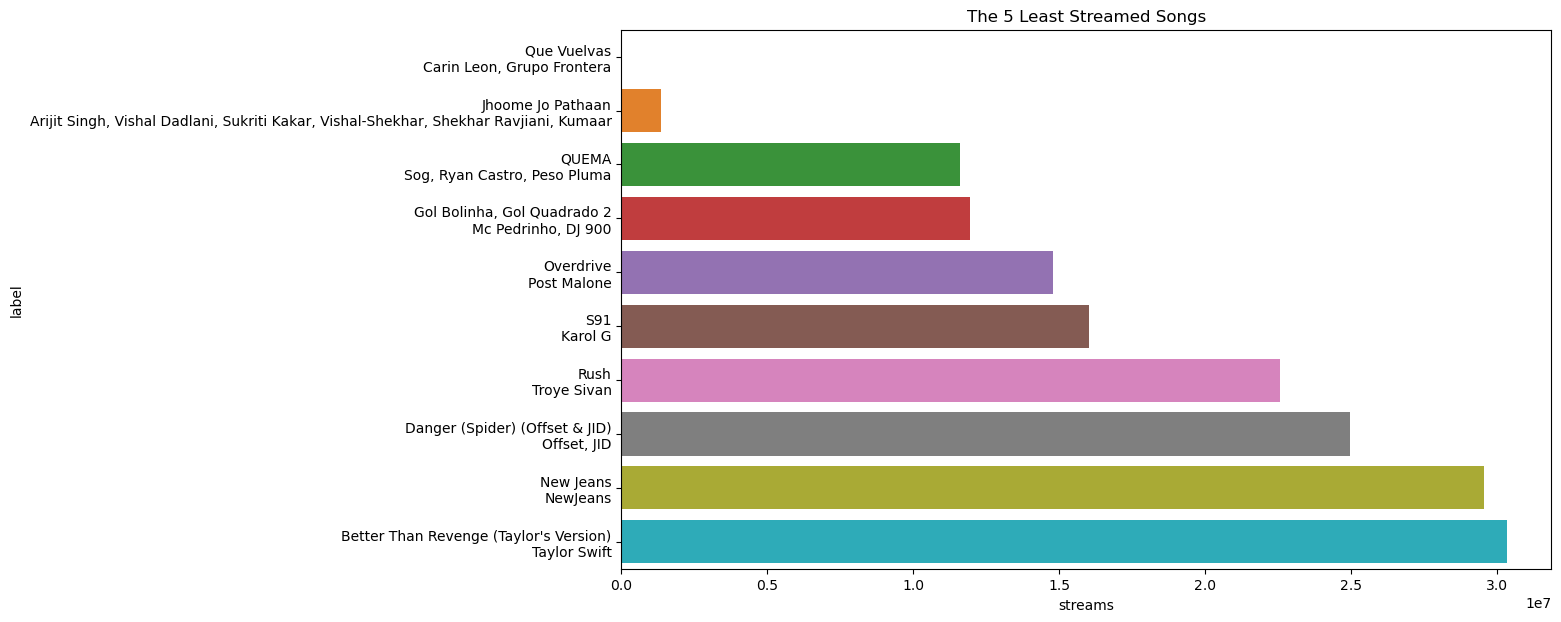

In [204]:
least_ten_streamed["label"]= least_ten_streamed["track_name"] + "\n" + least_ten_streamed["artist(s)_name"]
plt.figure(figsize=(12,7))
sns.barplot(x= "streams", y = "label", data=least_ten_streamed)
plt.title("The 5 Least Streamed Songs")
plt.show()

### The average value of common Audio Features present in the data

In [59]:
# To see which audio features have average high in top songs

audio_features = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]
average_values = data[audio_features].mean()
average_values=average_values.sort_values(ascending = False)
print("Average values of audio features:")
print(average_values)

Average values of audio features:
danceability_%        66.969570
energy_%              64.279119
valence_%             51.431270
acousticness_%        27.057712
liveness_%            18.213012
speechiness_%         10.131165
instrumentalness_%     1.581322
dtype: float64


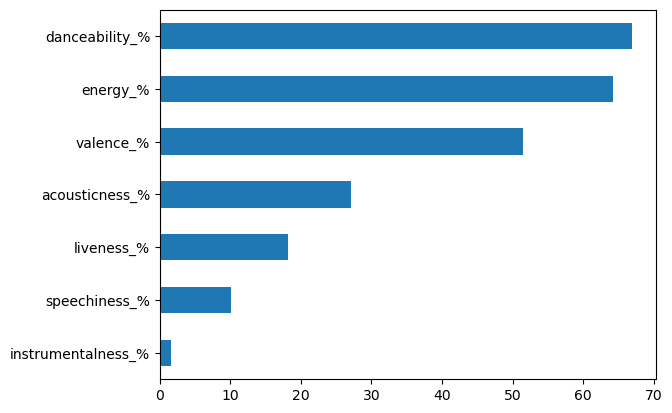

In [42]:
average_values.plot.barh()
plt.show()

### Top 10 Dancing Songs

In [45]:
# To see if top songs are high in danceability

top_ten_dance = data[["danceability_%", "track_name", "artist(s)_name"]].sort_values(by ="danceability_%", ascending = False).head(10)
top_ten_dance

,danceability_%,track_name,artist(s)_name
595,96,Peru,"Ed Sheeran, Fireboy DML"
224,95,Players,Coi Leray
250,95,The Real Slim Shady,Eminem
423,95,Super Freaky Girl,Nicki Minaj
702,95,Starlight,Dave
321,95,CAIRO,"Karol G, Ovy On The Drums"
876,95,Ai Preto,"L7nnon, DJ Biel do Furduncinho, Bianca"
268,94,Slut Me Out,NLE Choppa
943,93,Privileged Rappers,"Drake, 21 Savage"
142,93,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900"


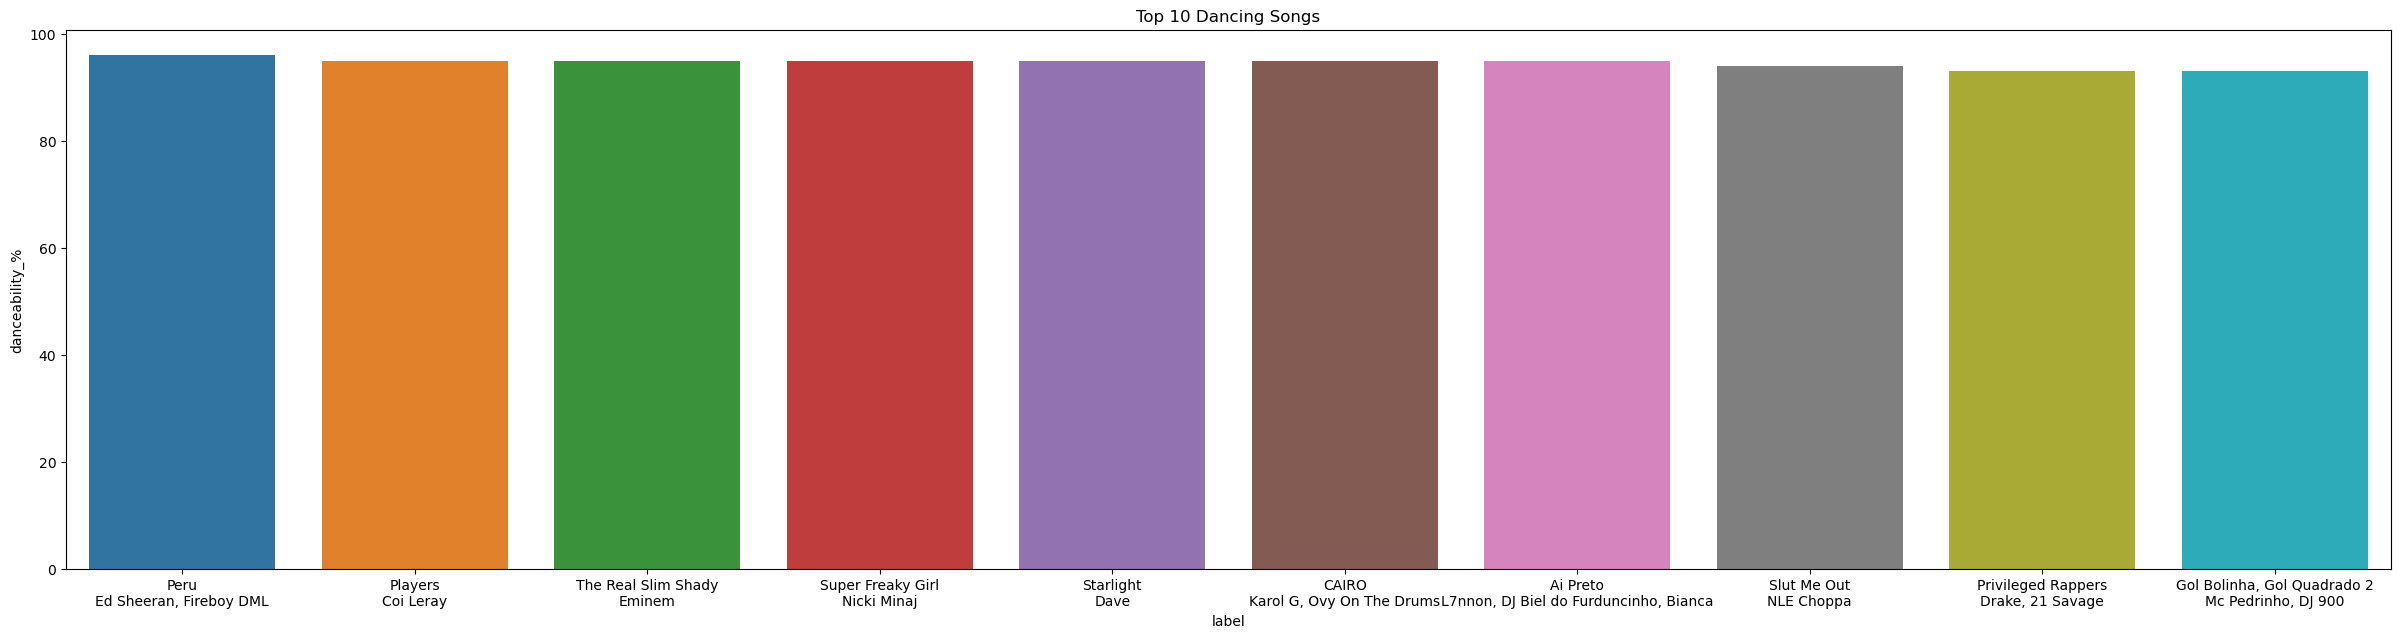

In [58]:
top_ten_dance["label"]= top_ten_dance["track_name"] + "\n" + top_ten_dance["artist(s)_name"]
plt.figure(figsize=(30,7))
sns.barplot(x= "label", y = "danceability_%", data=top_ten_dance)
plt.title("Top 10 Dancing Songs")
plt.show()

### Top 10 Most Energetic Songs

In [127]:
# To change the name of the song to the proper one

data["track_name"]=data["track_name"].replace("T��", "Ta Ok")


# To find information about YASOBI song so that we can the track_name data that was lost

info =data.iloc[174]


# Change to a proper track name 
data["track_name"]=data["track_name"].replace("������������", "アイドル")


# High energy songs

top_ten_energy=data[["energy_%", "track_name", "artist(s)_name"]].sort_values(by = "energy_%", ascending=False).head(10)
top_ten_energy

,energy_%,track_name,artist(s)_name
42,97,I'm Good (Blue),"Bebe Rexha, David Guetta"
319,97,Murder In My Mind,Kordhell
795,96,That That (prod. & feat. SUGA of BTS),"PSY, Suga"
60,96,Ta Ok,"dennis, MC Kevin o Chris"
367,95,Bombonzinho - Ao Vivo,"Israel & Rodolffo, Ana Castela"
475,94,Merry Christmas,"Ed Sheeran, Elton John"
552,94,Every Angel is Terrifying,The Weeknd
174,94,アイドル,YOASOBI
430,94,KICK BACK,Kenshi Yonezu
579,94,Freaks,Surf Curse


/Users/aruzhansatybay/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aruzhansatybay/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aruzhansatybay/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aruzhansatybay/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


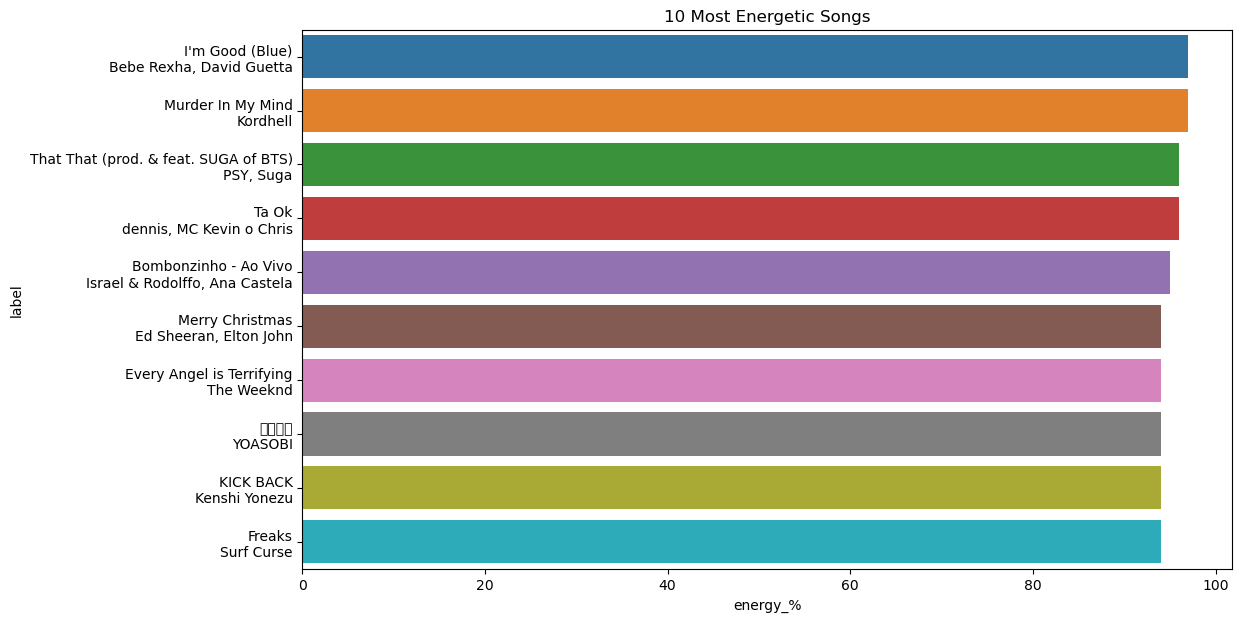

In [128]:
# to visualise top 10 most energetic songs. 
#the font that is used for this data visualisation does not japanese characters, so they will appear on the graph.
top_ten_energy["label"]= top_ten_energy["track_name"]+ "\n" + top_ten_energy["artist(s)_name"]
plt.figure(figsize = (12,7))
sns.barplot(x="energy_%", y= "label", data=top_ten_energy)
plt.title("10 Most Energetic Songs")
plt.show()

### Top 10 Most Acoustic Songs

In [208]:
# Top 10 most acoustic songs

top_ten_acoust = data[["acousticness_%", "track_name", "artist(s)_name"]].sort_values(by="acousticness_%", ascending=False).head(10)
top_ten_acoust

,acousticness_%,track_name,artist(s)_name
940,97,Sweet Nothing,Taylor Swift
167,97,The Night We Met,Lord Huron
17,96,What Was I Made For? [From The Motion Picture ...,Billie Eilish
575,95,LA FAMA (with The Weeknd),"The Weeknd, ROSALIA"
169,94,When I Was Your Man,Bruno Mars
858,94,Boyfriends,Harry Styles
587,93,Miserable Man,David Kushner
128,93,lovely - Bonus Track,"Billie Eilish, Khalid"
652,92,The Joker And The Queen (feat. Taylor Swift),"Ed Sheeran, Taylor Swift"
623,92,All of Me,John Legend


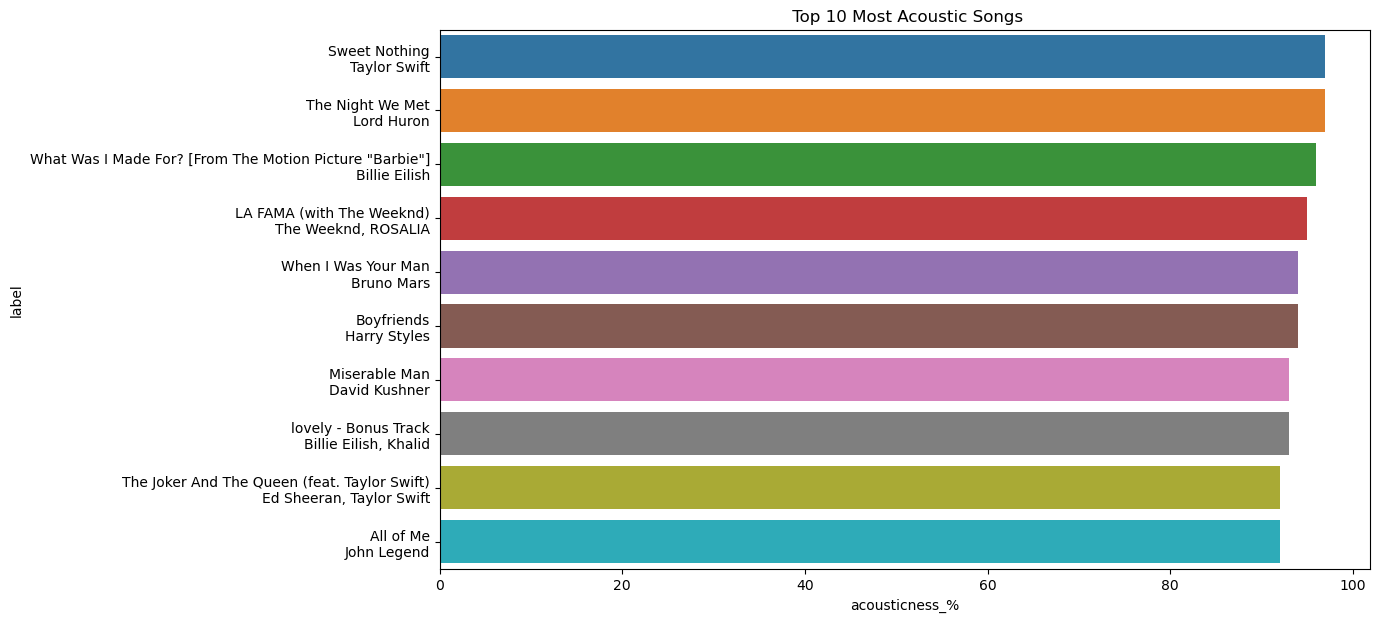

In [209]:
top_ten_acoust["label"]= top_ten_acoust["track_name"]+ "\n" + top_ten_acoust["artist(s)_name"]
plt.figure(figsize =(12,7))
sns.barplot(x="acousticness_%", y="label", data=top_ten_acoust)
plt.title(" Top 10 Most Acoustic Songs")
plt.show()

### Top 10 Most Positive Songs

In [195]:
# To see most positive songs in the data

top_ten_positive = data[["valence_%", "track_name", "artist(s)_name"]].sort_values(by="valence_%", ascending=False).head(10)
top_ten_positive

,valence_%,track_name,artist(s)_name
754,97,There's Nothing Holdin' Me Back,Shawn Mendes
861,97,En El Radio Un Cochinero,Victor Cibrian
896,97,JGL,"Luis R Conriquez, La Adictiva"
418,97,Doja,Central Cee
359,97,Zona De Perigo,Leo Santana
25,96,SABOR FRESA,Fuerza Regida
483,96,Deck The Hall - Remastered 1999,Nat King Cole
451,96,Feliz Navidad,José Feliciano
149,96,El Gordo Trae El Mando,Chino Pacas
117,96,Rara Vez,"Taiu, Milo j"


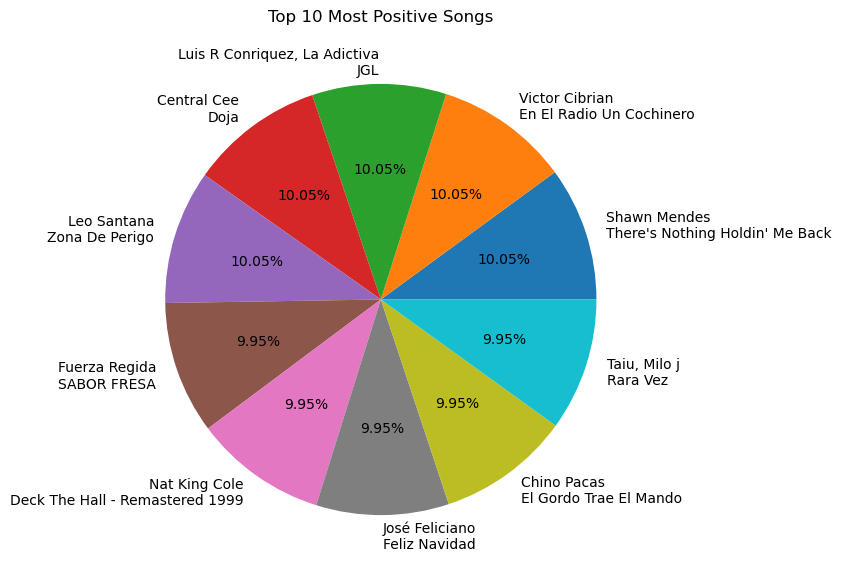

In [138]:
top_ten_positive["label"] = data["artist(s)_name"] +"\n"+ data["track_name"]
plt.figure(figsize=(12,7))
plt.pie(x= top_ten_positive["valence_%"], autopct="%1.2f%%", labels= top_ten_positive["label"])
plt.title("Top 10 Most Positive Songs")
plt.show()

# Conclusion

#### The most frequent year and month of the most streamed songs on Spotify is January 2022. 
#### The artist with the most amount of songs is Taylor Swift.
#### The most streamed song is "Blinding Lights" by TheWeekend.
#### The least streamed song is "Que Vuelvas	Carin Leon" by Grupo Frontera	with only 2762 streams.
#### With an average danceability score of approximately 67%, it suggests that the most streamed songs on Spotify tend to be quite danceable. These songs likely have rhythmic and groovy elements that make them suitable for dancing and moving to the beat. 
#### The average energy score of around 64% indicates that these songs are generally energetic and lively. They are likely to have a high tempo and vibrant instrumentation that keeps the listener engaged and excited.
#### The average valence score of about 51% suggests a balance between positive and negative emotions in these songs. They may have a mix of happy and melancholic elements, appealing to a wide range of emotional states.
#### With an average acousticness score of approximately 27%, these songs are not heavily reliant on acoustic instruments. They may incorporate more electronic or synthesized sounds, contributing to a modern and contemporary feel.